# Breakdown of science cases according to filter bandpass

The goal of this notebook is to explore what filter bandpasses were requested by different science cases. 

In [1]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
import json
import config_utils
import regions
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column

# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

The region of sky and filter choices requested by each science case are described in the file config/rgps_survey_regions.json, so we load that here.  

In [2]:
config = config_utils.read_config(path.join(root_dir, 'config', 'rgps_science_cases.json'))

sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

## How many science cases asked for single versus multiple filters?

Since the requested survey regions are recorded on a per filter basis, we can simply count the number of science cases that requested one or more filters.  We can also distinguish between the science cases requested by the community and those proposed by committee members. 

In [3]:
# Count of the number of community contributed science cases requesting 1, 2, 3, ...more filters
case_count = np.zeros(len(sim_config['OPTICAL_COMPONENTS'])+1)
cases = {n: [] for n in range(1,len(sim_config['OPTICAL_COMPONENTS'])+1,1)}

for author, info in config.items():
    if info['ready_for_use'] and 'Member' not in info['comment']:
        nf = 0
        for key in sim_config['OPTICAL_COMPONENTS']:
            if key in info.keys():
                nf += 1
        case_count[nf] += 1
        cases[nf].append(author)

print('Community WP/SP:')
for nf in range(1,9,1):
    if len(cases[nf]) > 0:
        print('Science cases requesting ' + str(nf) + ' filter(s): ' + ' '.join(cases[nf]))

# Count the number of committee member science cases requesting different filters
member_count = np.zeros(len(sim_config['OPTICAL_COMPONENTS'])+1)
member_cases = {n: [] for n in range(1,len(sim_config['OPTICAL_COMPONENTS'])+1,1)}

for author, info in config.items():
    if info['ready_for_use'] and 'Member' in info['comment']:
        nf = 0
        for key in sim_config['OPTICAL_COMPONENTS']:
            if key in info.keys():
                nf += 1
        member_count[nf] += 1
        member_cases[nf].append(author)

print('Committee members:')
for nf in range(1,9,1):
    if len(member_cases[nf]) > 0:
        print('Science cases requesting ' + str(nf) + ' filter(s): ' + ' '.join(member_cases[nf]))

Community WP/SP:
Science cases requesting 1 filter(s): Paladini Paladini2 Benecchi Werner Lian DAmmando Daylan Minniti2 Globular_Clusters Open_Clusters VVV_keyholes_1st_priority VVV_keyholes_2nd_priority Lim3_grism_targets Pascucci Ivanov1 Craig1 Hillenbrand Gramze Pal Craig Pardo
Science cases requesting 2 filter(s): Kruszynska Kupfer Anderson Freeman Rich Ivanov Craig2
Science cases requesting 3 filter(s): Zari Bachelet Villasenor Minniti Smith De_Furio Baravalle Meli Morihana2 Morihana1 Wang Lucas Lim2 Gallart Kuhn Minniti_GCs Saito
Science cases requesting 4 filter(s): Hunt Lim1 Navarro Carey2 Rich2 Sankrit Ivanov2 Saydjari Sabin Bonito
Science cases requesting 6 filter(s): Bahramian Carey1
Science cases requesting 8 filter(s): Lodieu2
Committee members:
Science cases requesting 3 filter(s): Drew De_Furio2
Science cases requesting 4 filter(s): Schlafly Zucker De
Science cases requesting 6 filter(s): Carey


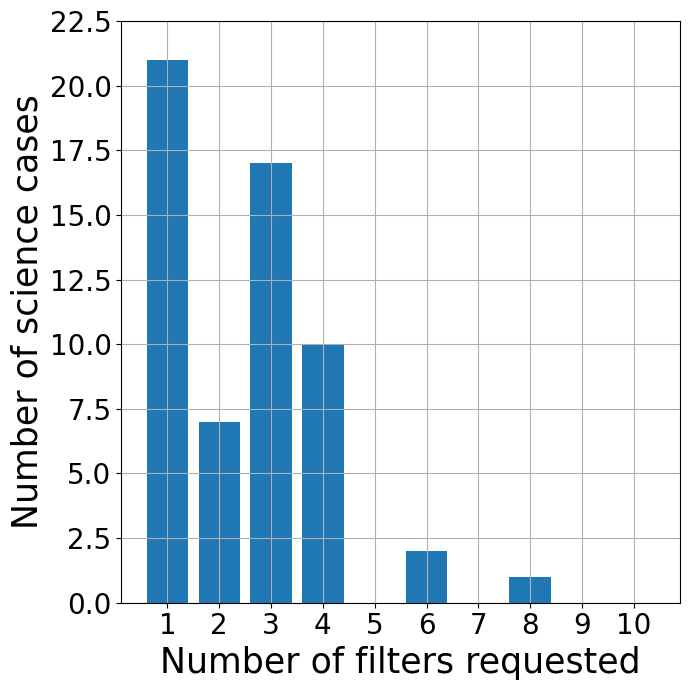

In [4]:
fig = plt.figure(1,(7,7))

plt.bar(np.arange(1,len(sim_config['OPTICAL_COMPONENTS'])+1,1, dtype='int'), case_count[1:], label='Community WP/SP')
#plt.bar(np.arange(1,len(sim_config['OPTICAL_COMPONENTS'])+1,1), member_count[1:], label='Committee member')

plt.xlabel('Number of filters requested', fontdict={'size': 25})
xticks = np.arange(1,len(sim_config['OPTICAL_COMPONENTS'])+1,1, dtype='int')
xticklabels = [str(int(x)) for x in xticks]
plt.xticks(xticks, xticklabels, fontsize=20)
yticks, yticklabels = plt.yticks()
yticklabels = [str(y) for y in yticks]
plt.yticks(yticks, yticklabels, fontsize=20)
plt.ylabel('Number of science cases', fontdict={'size': 25})
plt.grid()
#plt.rcParams.update({'font.size': 25})

#plt.title('Plot of the number of science cases requesting N filter bandpasses', fontdict={'size': 25})
plt.tight_layout()
plt.savefig(path.join(root_dir, 'optical_elements', 'bar_science_cases_nfilters.png'))

## Breakdown of the filter bandpasses requested

Now let's look at the breakdown of which filters, grism and prism were requested the most.

In [5]:
# Count for community contributed science cases
nvotes = [0]*len(sim_config['OPTICAL_COMPONENTS'])

for author, info in config.items():
    if info['ready_for_use'] and 'Member' not in info['comment']:
        for i, key in enumerate(sim_config['OPTICAL_COMPONENTS']):
            if key in info.keys():
                nvotes[i] += 1

# Count for the committee members science cases
com_nvotes = [0]*len(sim_config['OPTICAL_COMPONENTS'])

for author, info in config.items():
    if info['ready_for_use'] and 'Member' in info['comment']:
        for i, key in enumerate(sim_config['OPTICAL_COMPONENTS']):
            if key in info.keys():
                com_nvotes[i] += 1

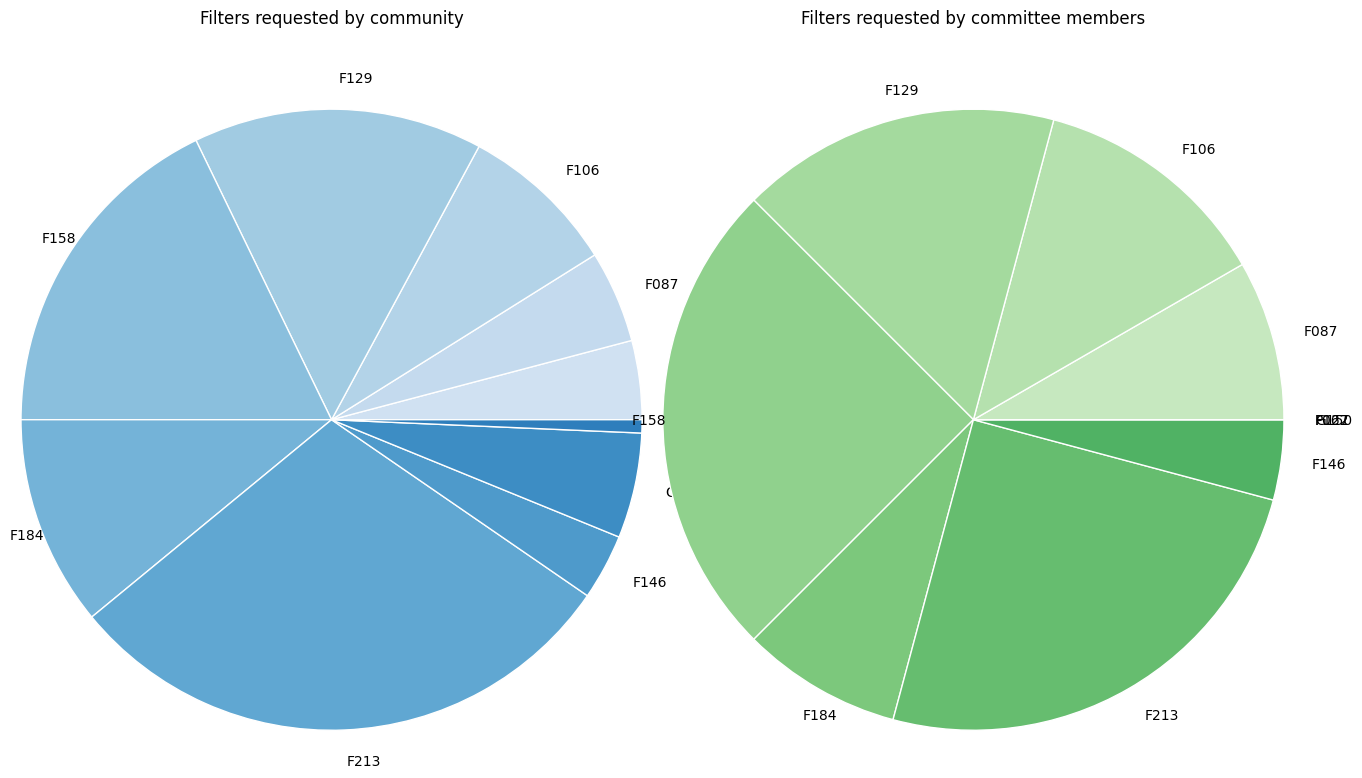

In [6]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
plt.subplots_adjust(left=0.0, bottom=0.1, right=1.0, top=0.3, wspace=0.0, hspace=0.0)

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(nvotes)))

axs[0].pie(nvotes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
      labels=sim_config['OPTICAL_COMPONENTS'])
axs[0].set_title('Filters requested by community', y=2.0)


colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(com_nvotes)))

axs[1].pie(com_nvotes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
      labels=sim_config['OPTICAL_COMPONENTS'])
axs[1].set_title('Filters requested by committee members', y=2.0)

plt.tight_layout()
plt.savefig(path.join(root_dir, 'optical_elements', 'filter_preferences.png'))

Frequency of community-requested filters


Optic,Nvotes
str4,int64
F062,6
F087,7
F106,12
F129,22
F158,26
F184,16
F213,43
F146,5
G150,8


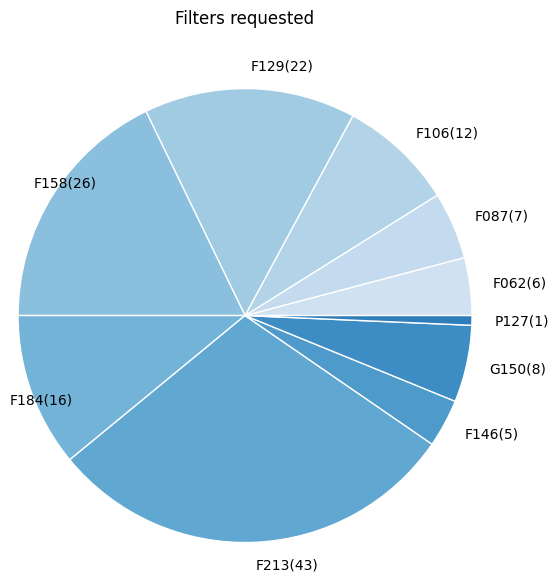

In [7]:
fig, axs = plt.subplots(1,1, figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.5, wspace=0.0, hspace=0.0)

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(nvotes)))

labels = [x + '('+str(nvotes[i])+')' for i,x in enumerate(sim_config['OPTICAL_COMPONENTS'])]

axs.pie(nvotes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
      labels=labels)
axs.set_title('Filters requested', y=2.0)
plt.rcParams.update({'font.size': 18})

plt.tight_layout()
plt.savefig(path.join(root_dir, 'optical_elements', 'filter_preferences.png'))

vote_table = Table([
    Column(name='Optic', data=sim_config['OPTICAL_COMPONENTS']),
    Column(name='Nvotes', data=nvotes)
])

print('Frequency of community-requested filters')
vote_table

Text(0.5, 1.0, 'Number of science cases requesting each optical element')

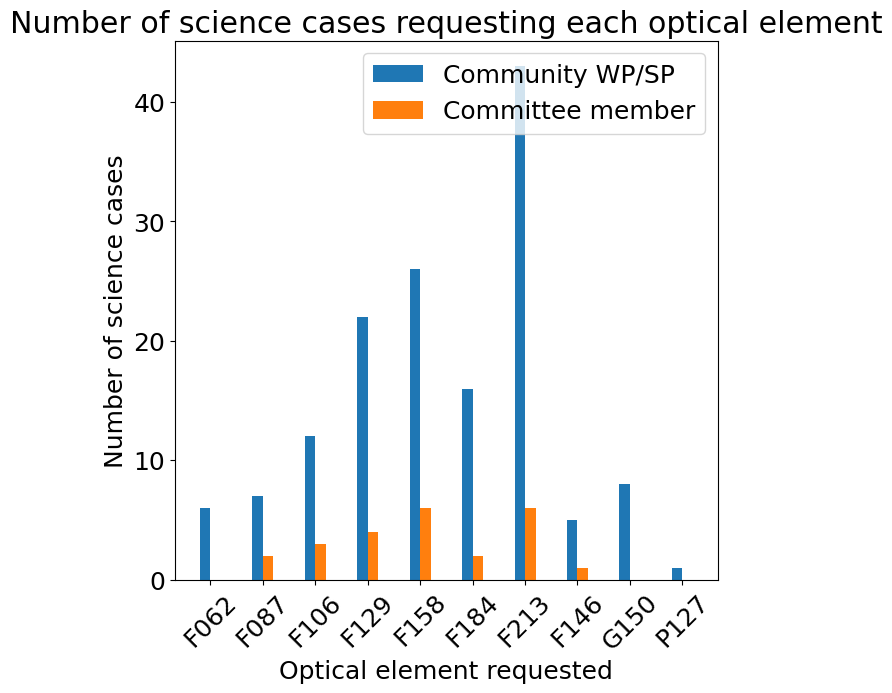

In [8]:
fig = plt.figure(1,(7,7))

plt.bar(np.arange(0,len(sim_config['OPTICAL_COMPONENTS']),1)-0.1, nvotes, width=0.2, label='Community WP/SP')
plt.bar(np.arange(0,len(sim_config['OPTICAL_COMPONENTS']),1)+0.1, com_nvotes, width=0.2, label='Committee member')

plt.xlabel('Optical element requested')
plt.ylabel('Number of science cases')
plt.xticks(ticks=np.arange(0,len(sim_config['OPTICAL_COMPONENTS']),1), labels=sim_config['OPTICAL_COMPONENTS'], rotation=45.0)

plt.legend()

plt.title('Number of science cases requesting each optical element')

Provide a listing of the science cases that request specific optics:

In [9]:
def get_science_cases_for_optic(config, optic):
    cases = {}

    print('Science cases requesting optic ' + optic)
    for author, info in config.items():
        if info['ready_for_use'] and 'Member' not in info['comment']:
            if optic in info.keys():
                cases[author] = info
                print(author + ': ' + info['comment'] + ' ' + info['category'])
    return cases

In [10]:
# List out spectroscopic cases
cases = get_science_cases_for_optic(config, 'P127')
cases = get_science_cases_for_optic(config, 'G150')

Science cases requesting optic P127
Rich2: Stellar populations; time domain survey of nuclear region galactic_center
Science cases requesting optic G150
Anderson: Ionized Hydrogen in ISM.  F184 filter there could be other bright lines, so it may be difficult to isolate emission from Pa-alpha without G150 for at least a selected sub-region molecular_clouds
Lim1: Young Stellar Object spectroscopy SFR
Rich2: Stellar populations; time domain survey of nuclear region galactic_center
Lim3_grism_targets: W51, M17 and/or M16, in priority order, from Wanggi Lim SFR
Pascucci: Grism spectroscopy of SFRs SFR
Ivanov1: Library of stellar spectra stellar_spectra
Hillenbrand: Spectroscopic observations of non-crowded star fields for stellar characterization and extinction stellar_spectra
Pal: Stellar spectral template library; regions in order of priority; data on one region valuable stellar_spectra


## F106 or F184? 

The community-requested science cases are almost evenly split between the F106 and F184 filters.  So let's explore what science is requesting each filter.  This is most easily done using the HEALpixel regions, so let's load those for all the science cases.  

In [11]:
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

In [12]:
science_regions = regions.load_regions_from_file(sim_config,
                                                         path.join(root_dir, 'region_data', 'rgps_science_regions.json'))

Now we can create a region for the area of interest: 

In [13]:
test_config = {
    "wide_area": {
        "F106":[{   # Nominal filter used to fit required structure
            "l": [
                -80.0,
                50.0
            ],
            "b": [
                -2.0,
                2.0
            ],
            "nvisits": 1,
            "duration": 730.0,
            "visit_interval": [None],
            "name": "F106_wide_area"
            }],
        "F184":[{   # Nominal filter used to fit required structure
            "l": [
                -80.0,
                50.0
            ],
            "b": [
                -2.0,
                2.0
            ],
            "nvisits": 1,
            "duration": 730.0,
            "visit_interval": [None],
            "name": "F184_wide_area"
            }],
    "comment": "None",
    "ready_for_use": "True"
    }
}

test_regions = regions.build_region_maps(sim_config, test_config)

Problem with:  wide_area {'F106': [{'l': [-80.0, 50.0], 'b': [-2.0, 2.0], 'nvisits': 1, 'duration': 730.0, 'visit_interval': [None], 'name': 'F106_wide_area', 'label': 'wide_area_F106_wide_area', 'optic': 'F106'}], 'F184': [{'l': [-80.0, 50.0], 'b': [-2.0, 2.0], 'nvisits': 1, 'duration': 730.0, 'visit_interval': [None], 'name': 'F184_wide_area'}], 'comment': 'None', 'ready_for_use': 'True'}


NameError: name 'exit' is not defined

In [ ]:
# Count for community contributed science cases
nvotes = [0]*2
authors_per_filter = {'F106': [], 'F184': []}

for i, optic in enumerate(['F106', 'F184']):
    print('Optic = ' + optic)
    for author, info in science_regions.items():
        overlap = False
        for r1 in test_regions['wide_area'][optic]:
            if optic in info.keys():
                for r2 in info[optic]:
                    idx = set(r1.pixels).intersection(set(r2.pixels))
                    if len(idx) > 0 and not overlap: 
                        overlap = True
                        authors_per_filter[optic].append(author)
                        print('Test region overlaps with ' + author)
        if overlap:
            nvotes[i] += 1

print(nvotes)
print(authors_per_filter)

In [ ]:
cases = get_science_cases_for_optic(config, 'F106')
print('\n')
cases = get_science_cases_for_optic(config, 'F184')

## Filter requests by science category

We can use the categorized science case requirements to look for trends by science case.

In [14]:
science_categories = []
for author, info in config.items():
    if info['ready_for_use'] and info['category'] not in science_categories:
        science_categories.append(info['category'])
science_categories

['wide_area',
 'time_domain',
 'SFR',
 'solar_system',
 'high_cadence',
 'globular_clusters',
 'molecular_clouds',
 'AGN',
 'open_clusters',
 'variable_stars',
 'galactic_center',
 'keyholes',
 'stellar_spectra',
 'extinction',
 'novae',
 'ISM',
 'YSO',
 'GW']

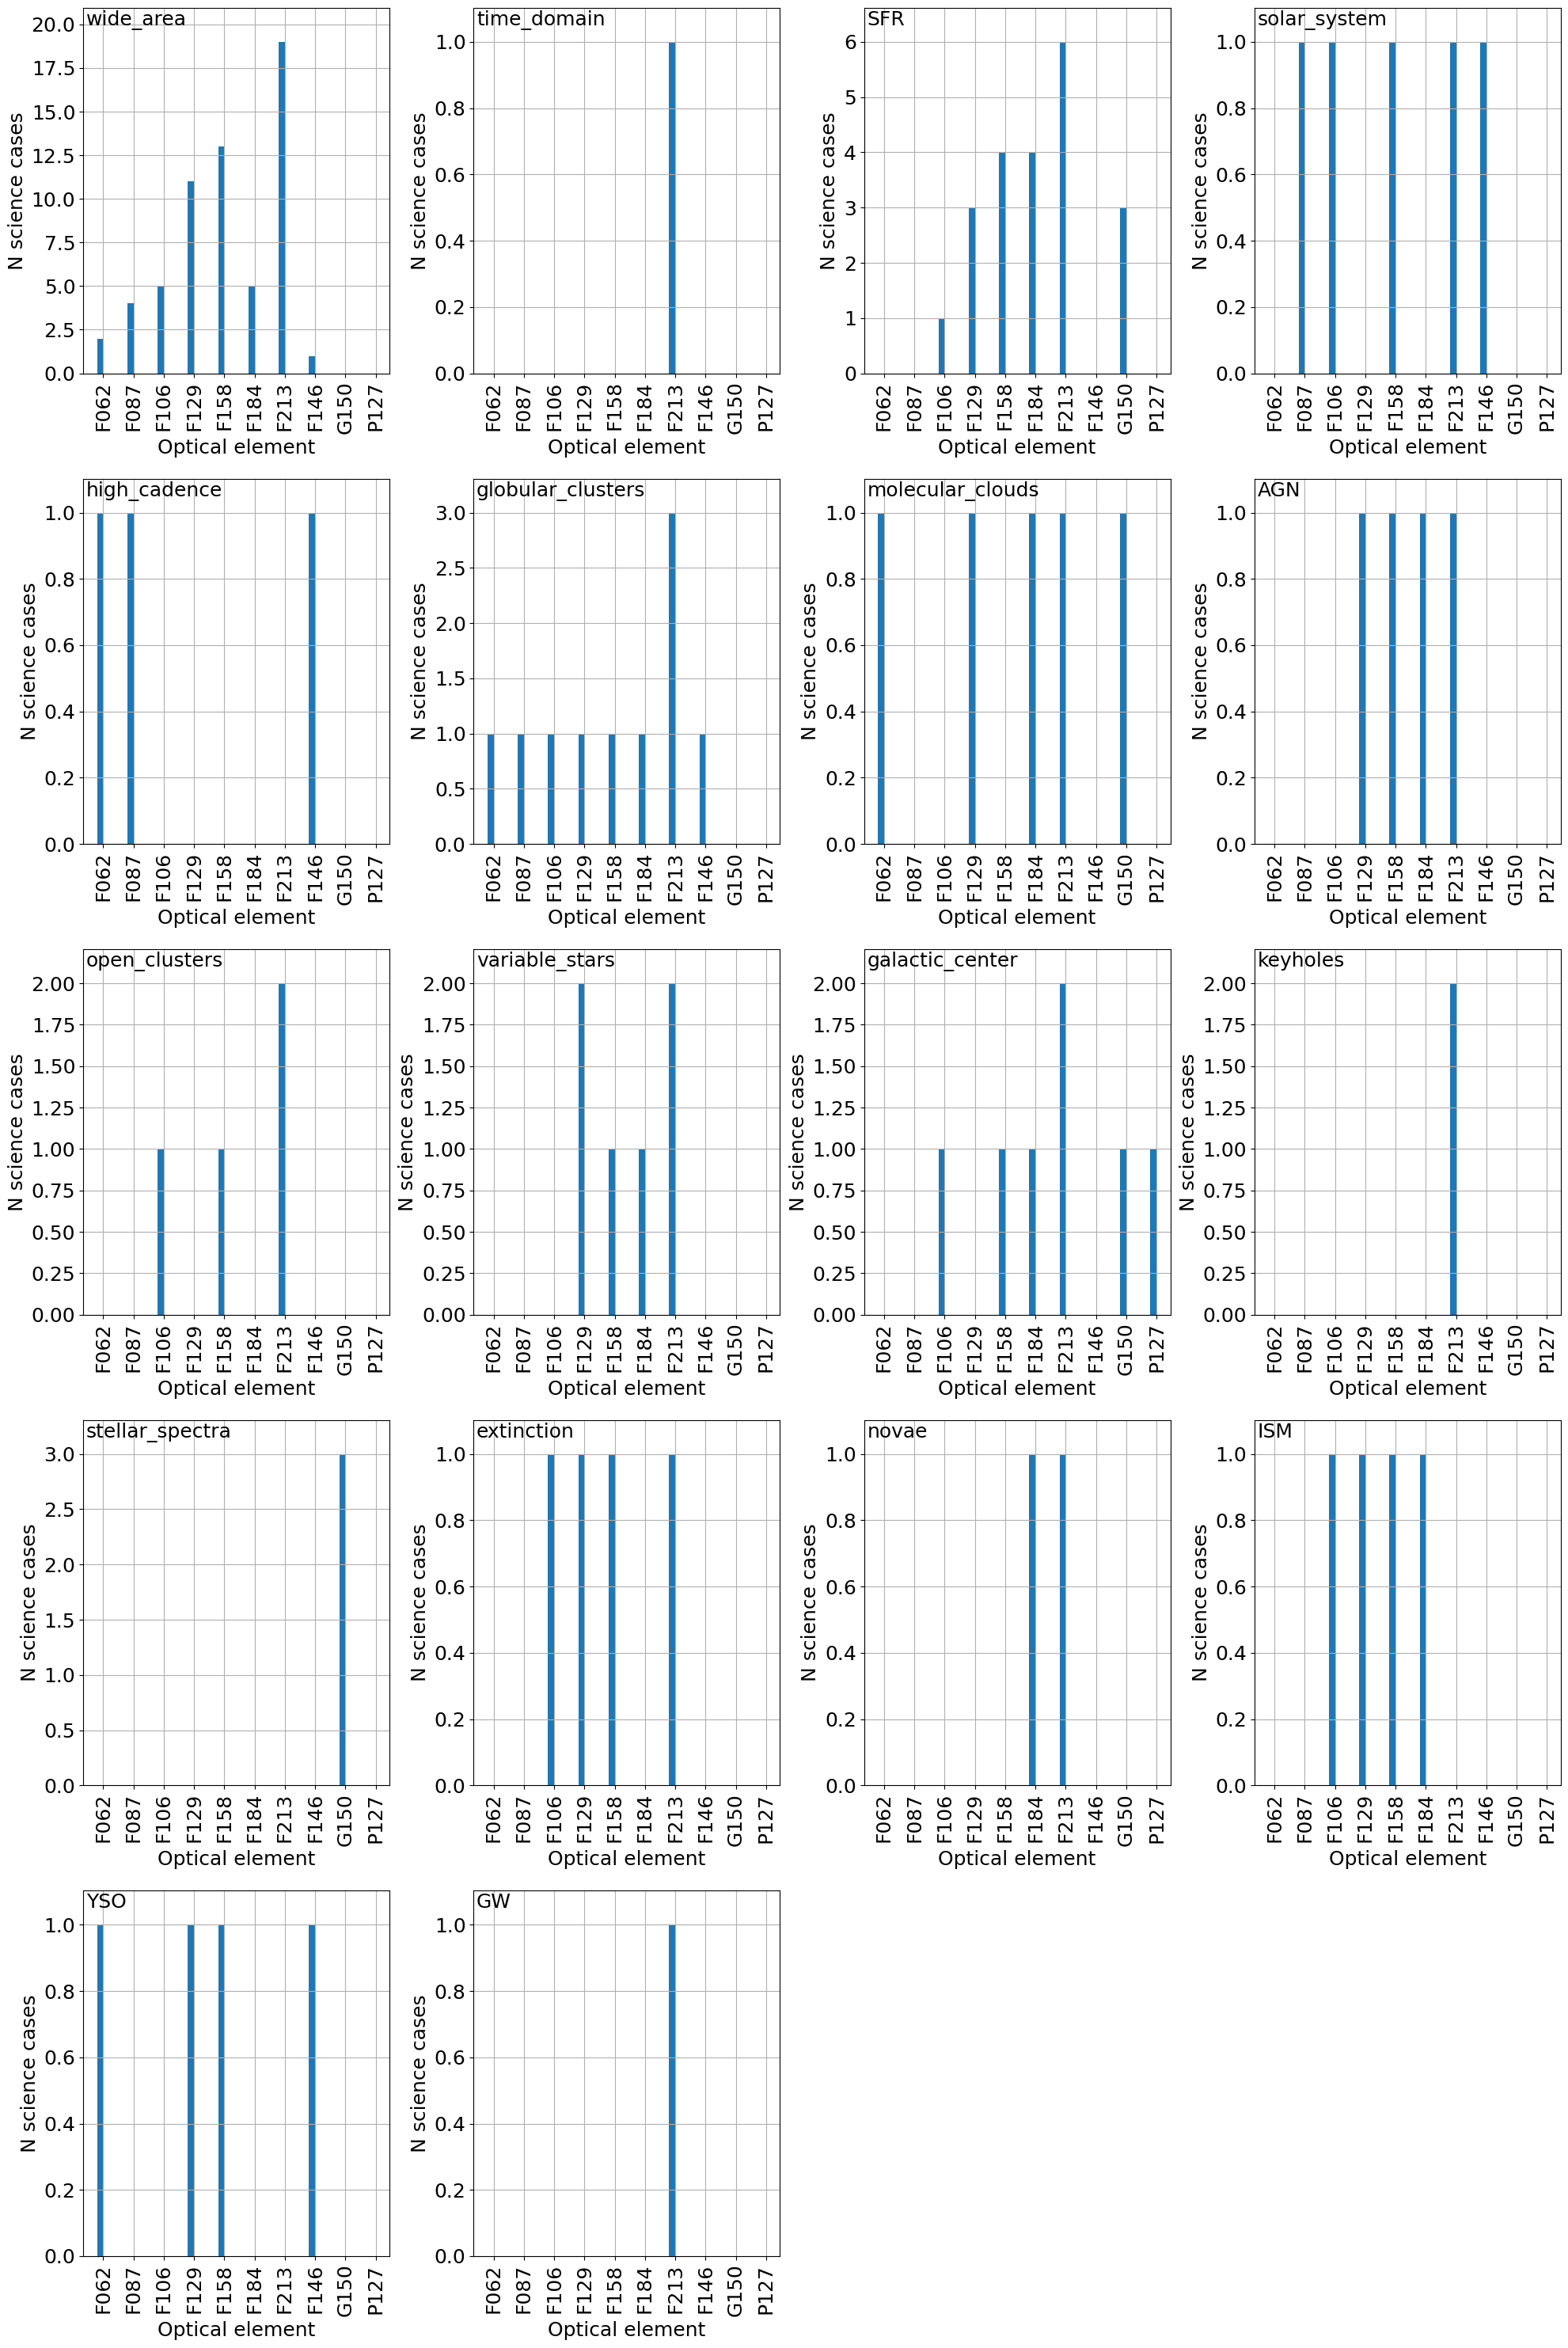

In [15]:
nrows = 5
ncols = 4
irow = 0
icol = 0
fig,axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,30))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
for k,cat in enumerate(science_categories):
    science_cases = {author: info for author, info in config.items() if info['category'] == cat}

    nvotes = [0]*len(sim_config['OPTICAL_COMPONENTS'])

    for author, info in science_cases.items():
        if info['ready_for_use'] and 'Member' not in info['comment']:
            for i, key in enumerate(sim_config['OPTICAL_COMPONENTS']):
                if key in info.keys():
                    nvotes[i] += 1

    axs[irow, icol].bar(np.arange(0,len(sim_config['OPTICAL_COMPONENTS']),1)-0.1, nvotes, width=0.2, label=cat)

    axs[irow, icol].set_xlabel('Optical element')
    axs[irow, icol].set_ylabel('N science cases')
    axs[irow, icol].set_xticks(ticks=np.arange(0,len(sim_config['OPTICAL_COMPONENTS']),1), labels=sim_config['OPTICAL_COMPONENTS'], rotation=90.0)
    axs[irow, icol].grid()
    (xmin, xmax) = axs[irow, icol].get_xlim()
    (ymin, ymax) = axs[irow, icol].get_ylim()
    axs[irow, icol].set_ylim([ymin, ymax*1.05])
    axs[irow, icol].annotate(cat, (xmin+0.1, ymax))
    
    icol += 1
    if icol == ncols:
        icol = 0
        irow +=1

# Blank off the axes for the excess plots 
axs[irow, icol].axis('off')
axs[irow, icol+1].axis('off')

plt.tight_layout()
plt.savefig(path.join(root_dir, 'optical_elements', 'filter_preferences_science_category.png'))

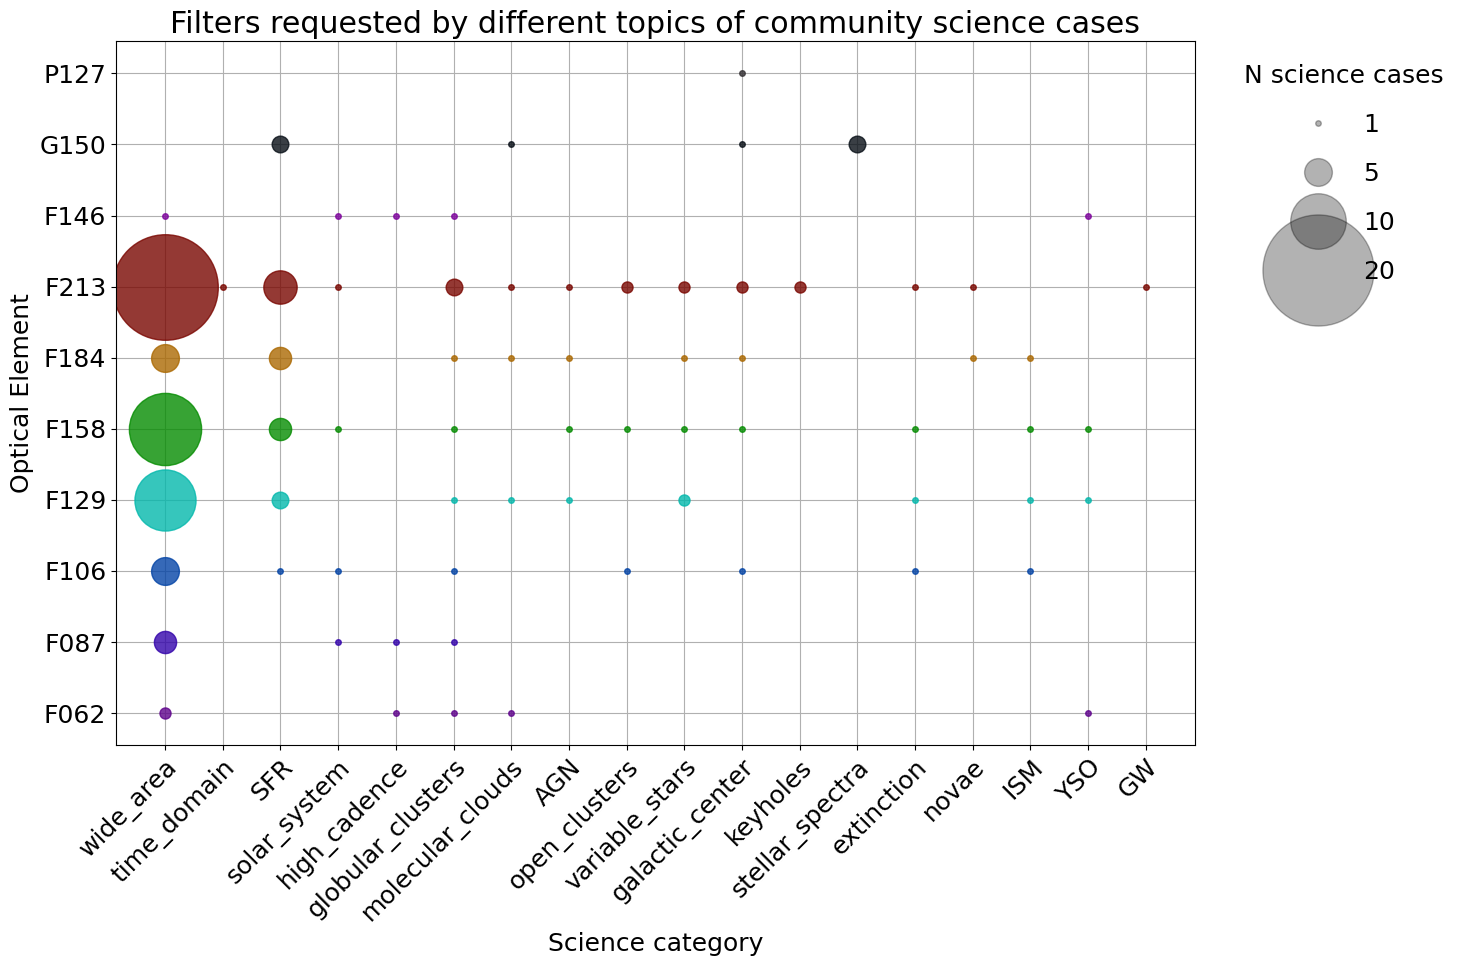

In [45]:
fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

fseq = [f for f in sim_config['OPTICAL_COMPONENTS'] if 'all_optics' not in f]
plot_colours = [sim_config['PLOT_COLORS'][key] for key in fseq]

xticklabels = []
scale_factor = 4.0 # Scale factor for point size
for k,cat in enumerate(science_categories):
    science_cases = {author: info for author, info in config.items() if info['category'] == cat}
    xticklabels.append(cat)
    
    for i, key in enumerate(sim_config['OPTICAL_COMPONENTS']):
        nvotes = 0
        for author, info in science_cases.items():
            if info['ready_for_use'] and 'Member' not in info['comment']:
                if key in info.keys():
                    nvotes += 1

        #print (k, cat, i, key, nvotes)
        plt.plot(
            k, 
            i,
            color=plot_colours[i], 
            marker='o', 
            markersize=nvotes*scale_factor, 
            alpha=0.8
        )

axs.set_title('Filters requested by different topics of community science cases')
axs.set_xlabel('Science category')
axs.set_ylabel('Optical Element')
axs.set_yticks(ticks=np.arange(0,len(fseq),1), labels=fseq)
axs.set_xticks(ticks=np.arange(0,len(science_categories),1), labels=xticklabels, rotation=45.0, ha="right", rotation_mode="anchor")
axs.grid()

for entry in [1, 5, 10, 20]:
    plt.plot([], [], c='k', alpha=0.3, markersize=entry*scale_factor, marker='o', ls='none', label=str(entry))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='N science cases', bbox_to_anchor=(1.025, 1.0))

plt.tight_layout()
#plt.savefig(path.join(root_dir, 'optical_elements', 'filter_preferences_science_category.png'))